# Analyze and Reason on Multimodal Data with Gemini: Challenge Lab

## GSP524

## Challenge Scenario

#### Cymbal Direct: Analyzing Social Media Engagement for a New Product Launch

Cymbal Direct just launched a new line of athletic apparel designed for enhanced performance during various activities. To gauge public perception and potential market impact, Cymbal Direct is tasked with analyzing social media engagement across multiple platforms. This analysis will involve:
  * **Text**: Analyzing customer reviews and social media posts for sentiment and key themes.
  * **Image**: Analyzing images posted by influencers and customers wearing the apparel to identify style trends and usage patterns.
  * **Audio** Analyzing an audio clip of a podcast episode of a recent interview about Cymbal Direct's new product launch.

The goal is to provide Cymbal Direct with actionable insights to refine their marketing strategy, improve their products, and bolster product positioning. Are you ready for the challenge?

## Task 1. Import libraries and install the Gen AI SDK

In this section, you will import the libraries required for this lab and install the Google Gen AI SDK.

**All cells have been written for you in this section. There are no `#TODOs` required.**

### Install Google Gen AI SDK for Python

In [1]:
%pip install --upgrade --quiet google-genai

Note: you may need to restart the kernel to use updated packages.


### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [2]:
# Restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### Import Libraries

In [1]:
from IPython.display import HTML, Markdown, display
from google import genai
from google.genai import types
from google.genai.types import (
    FunctionDeclaration,
    GenerateContentConfig,
    GoogleSearch,
    MediaResolution,
    Part,
    Retrieval,
    SafetySetting,
    Tool,
    ToolCodeExecution,
    ThinkingConfig,
    GenerateContentResponse,
    GenerateContentConfig,    
    VertexAISearch,
)
from collections.abc import Iterator
import os

### Set Google Cloud project information and initialize Google Gen AI SDK

In [2]:
import os
os.makedirs('analysis', exist_ok=True)

PROJECT_ID = os.environ.get("GOOGLE_CLOUD_PROJECT")
LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")
print(f"Project ID: {PROJECT_ID}")
print(f"LOCATION: {LOCATION}")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

Project ID: qwiklabs-gcp-00-7d1dee048256
LOCATION: us-central1


### Load the Gemini 2.0 Flash model

Learn more about all [Gemini models on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models).

In [3]:
MODEL_ID = "gemini-2.0-flash-001"  # @param {type: "string"}

## Task 2. Analyze and reason on customer feedback (text)

In this task, you'll use the Gemini 2.0 Flash and Gemini-2.5-flash models to analyze customer reviews and social media posts in text format about Cymbal Direct's new athletic apparel. You will save the findings from the model into a markdown file that you will use for a comprehensive report in the last task.

**Your tasks will be labeled with a `#TODO` section in the cell. Read each cell carefully and ensure you are filling them out correctly!**

###  Load and preview the text data
This file contains customer reviews and social media posts about Cymbal Direct's new athletic apparel line, collected from various e-commerce platforms and social media sites. The data is in raw text format, with each review or post separated by a newline.

In [4]:
# Load and preview the text data (reviews.txt)
!gcloud storage cp gs://{PROJECT_ID}-bucket/media/text/reviews.txt media/text/reviews.txt
!head media/text/reviews.txt

Copying gs://qwiklabs-gcp-00-7d1dee048256-bucket/media/text/reviews.txt to file://media/text/reviews.txt
  Completed files 1/1 | 3.3kiB/3.3kiB                                          
Reviews & Posts:

1. @FitnessFanaticKate (Twitter): Obsessed with the new Cymbal Direct leggings! The fabric is so soft and supportive. Finally, a legging that doesn't slip during my runs! #CymbalDirect #Activewear #LeggingsLove

2. Amazon Review (5 Stars): "Bought the 'Pulse' running shorts. Lightweight, breathable, and dries quickly. Exactly what I needed for summer workouts!"

3. @GymRatGary (Instagram): Cymbal Direct's new line isâ€¦okay. Nothing groundbreaking, but the 'Endure' t-shirt is decent quality for the price. #CymbalDirect #GymLife #FitnessApparel

4. Facebook Post (Sarah Miller): "Anyone else try the new Cymbal Direct stuff? I got the 'Flow' yoga pants, and they're a little too tight around the waistband, even though I ordered my usual size. Disappointed. ðŸ˜•"



### Initial Analysis with Gemini 2.0 Flash
For this section, you will need to fill out the `#TODOs` for **Construct the prompt for Gemini** and **Send the prompt to Gemini**.

In [5]:
# 1. Load the text data (reviews.txt)
with open('media/text/reviews.txt', 'r') as f:
    text_data = f.read()

# 2. Construct the prompt for Gemini
# TODO: Write a prompt that instructs the Gemini model to analyze the customer reviews and social media posts.
# The prompt should include clear instructions to:
# - Identify the overall sentiment (positive, negative, or neutral) of each review or post.
# - Extract key themes and topics discussed, such as product quality, fit, style, customer service, and pricing.
# - Identify any frequently mentioned product names or specific features.
prompt = f"""
analyze the customer reviews and social media posts. for each review/post:
- Identify the overall sentiment (positive, negative, or neutral) of each review or post.
- Extract key themes and topics discussed, such as product quality, fit, style, customer service, and pricing.
- Identify any frequently mentioned product names or specific features.
reviews and posts:
{text_data}
"""

# 3. Send the prompt to Gemini
# TODO: Use the `client.models.generate_content` method to send the prompt and text data to the Gemini model.
# TODO: Make sure to specify the `MODEL_ID` and the `prompt` as parameters.
# TODO: Store the response from the model in a variable named `response`.
response = client.models.generate_content(
    model=MODEL_ID, contents=prompt,
)

# 4. Display the response
display(Markdown(response.text))

Okay, here's an analysis of each review and social media post, broken down as requested:

**Review/Post Analysis:**

| # | Source                | Sentiment | Key Themes/Topics                                                                                                                                   | Product Names/Specific Features                                                                        |
|---|-----------------------|-----------|------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| 1 | @FitnessFanaticKate (Twitter) | Positive  | Fabric quality, fit (doesn't slip), support                                                                                                     | Cymbal Direct leggings, soft fabric, supportive                                                          |
| 2 | Amazon Review          | Positive  | Lightweight, breathability, quick-drying                                                                                                            | 'Pulse' running shorts                                                                                    |
| 3 | @GymRatGary (Instagram)     | Neutral   | Quality (decent for price), Overall impression (nothing groundbreaking), Price                                                                      | 'Endure' t-shirt                                                                                       |
| 4 | Facebook Post          | Negative  | Fit (too tight around waistband), sizing issues                                                                                                   | 'Flow' yoga pants                                                                                     |
| 5 | CymbalDirect.com Review | Positive  | Layering ability, color options, wrinkle-prone material                                                                                              | 'Stride' tank top                                                                                       |
| 6 | @SweatyBetty123 (Twitter) | Negative  | Overhyped, disappointing apparel, expectations not met                                                                                            | (Implied) Cymbal Direct apparel in general                                                             |
| 7 | Amazon Review          | Negative  | Durability (seam ripped), poor quality                                                                                                              | 'Power' hoodie                                                                                        |
| 8 | @RunnergirlRachel (Instagram Story) | Neutral   | Support (testing), sports bra functionality                                                                                                | Cymbal Direct sports bra                                                                               |
| 9 | Facebook Post          | Neutral   | Packaging, perceived quality (feels cheap)                                                                                                          | 'Apex' training shorts                                                                                  |
| 10| CymbalDirect.com Review | Positive  | Lightweight, windproof, appearance, suitability for chilly weather                                                                                     | 'Zenith' jacket                                                                                       |
| 11| @YogaWithMia (Twitter)     | Positive  | Comfort, fit (stays in place, like a second skin), suitability for yoga                                                                                  | Cymbal Direct 'Balance' leggings                                                                      |
| 12| Amazon Review          | Neutral   | Color discrepancy (different than online), fit (okay), not a repurchase                                                                                   | 'Velocity' shirt                                                                                      |
| 13| @CrossfitChris (Instagram)  | Neutral   | Range of motion, durability (could be tougher), suitability for CrossFit                                                                                   | Cymbal Direct 'Strength' shorts                                                                      |
| 14| Facebook Post          | Neutral   | Sizing concerns (runs true to size?)                                                                                                                    | (Implied) All Cymbal Direct products                                                                  |
| 15| CymbalDirect.com Review | Negative  | Sizing issues (chart inaccurate, too small), annoyance                                                                                               | (Implied) Cymbal Direct clothing, sizing chart                                                          |
| 16| @HikingHannah (Twitter)    | Positive  | Water-resistance, comfort, suitability for hiking                                                                                                    | Cymbal Direct 'Summit' hiking pants                                                                      |
| 17| Amazon Review          | Positive  | Value for price, appearance (cute), functionality for everyday wear                                                                                   | 'Energy' tank                                                                                       |
| 18| @PilatesPete (Instagram)  | Neutral   | Support, restrictiveness, suitability for Pilates                                                                                                      | Cymbal Direct 'Control' top                                                                           |
| 19| Facebook Post          | Negative  | Customer service (unresponsive to emails), return issues                                                                                                | (Implied) All Cymbal Direct products and the return process                                                 |
| 20| CymbalDirect.com Review | Positive  | Inclusivity (plus-size), comfort, support, flattering, appreciation                                                                                 | 'Empower' collection, plus-size activewear                                                             |

**Summary of Key Themes and Trends:**

*   **Sizing Issues:** This is a recurring problem, mentioned in multiple reviews (Posts 4, 15, 14). Customers are unsure about sizing and find the sizing chart inaccurate.
*   **Quality Concerns:** Several reviews express concern about the quality and durability of the apparel (Posts 7, 9, 13). Some find the materials to be cheap, and seams rip easily.
*   **Fit:** Fit is a frequent topic, with varied opinions. Some customers praise the fit and support (Posts 1, 11, 20), while others find items too tight or restrictive (Posts 4, 18).
*   **Specific Product Performance:** Reviews often focus on the performance of specific items for particular activities, such as running, yoga, and hiking.
*   **Customer Service:** Negative feedback regarding customer service, specifically regarding returns (Post 19).
*   **Plus-Size Inclusivity:** The 'Empower' collection for plus-size athletes is a significant positive highlight (Post 20).

**Frequently Mentioned Product Names/Features:**

*   Specific product lines are mentioned a lot, this indicates a strong push on Cymbal Direct's part to sell these products or these products being top sellers. Examples: the 'Pulse' running shorts, the 'Endure' t-shirt, the 'Flow' yoga pants, the 'Stride' tank top, the 'Power' hoodie, the 'Zenith' jacket, the 'Balance' leggings, the 'Velocity' shirt, the 'Strength' shorts, the 'Summit' hiking pants, the 'Energy' tank, the 'Control' top, the 'Empower' collection
*   Supportiveness and comfort are highly mentioned.


### Deep Dive with Gemini-2.5-flash Model  

Now that you have generated some insights based on the reviews, you will use the Gemini-2.5-flash model to explore the reviews in more detail, and come up with some takeaways and use reasoning to create actionable insights for your team.

In [6]:
MODEL_ID = "gemini-2.5-flash"  # @param {type: "string"}

### Helper functions

Create methods to print out the thoughts and answer.

In [7]:
def print_thoughts(response: GenerateContentResponse) -> None:
    for part in response.candidates[0].content.parts:
        header = "Thoughts" if part.thought else "Answer"
        display(Markdown(f"""## {header}:\n{part.text}"""))


def print_thoughts_stream(response: Iterator[GenerateContentResponse]) -> None:
    display(Markdown("## Thoughts:\n"))
    answer_shown = False

    for chunk in response:
        for part in chunk.candidates[0].content.parts:
            if not part.thought and not answer_shown:
                display(Markdown("## Answer:\n"))
                answer_shown = True
            display(Markdown(part.text))

### Enable thoughts

You set the flag `include_thoughts` in the `ThinkingConfig` to indicate whether to return thoughts in the model response. The flag is set to `False` by default. You will also set the optional `thinking_budget` parameter in the ThinkingConfig to control and configure how much a model thinks on a given user prompt.

**Hint: you will need to use this for calls to the Thinking model!**

In [8]:
config=types.GenerateContentConfig(thinking_config=types.ThinkingConfig(include_thoughts=True,thinking_budget=1024))

### Deep Dive with Gemini-2.5-flash: Reasoning on Customer Sentiment

In this section, you'll use the Thinking model to delve deeper into the customer sentiment and identify key areas for improvement. We're particularly interested in understanding the reasoning behind positive and negative reviews and uncovering any recurring themes that might not be immediately apparent.

For this section, you will need to fill out the `#TODOs` for **Construct the prompt for Gemini** and **Send the prompt to the Gemini Thinking model**.

In [9]:
# 1. Construct the prompt for Gemini
# TODO: Write a prompt that instructs the Gemini model to analyze the customer reviews and social media posts in more detail.
# The prompt should include clear instructions to:
# - Identify the main factors driving positive and negative sentiment.
# - Assess the overall impact of the new athletic apparel line on brand perception.
# - Identify three key areas where Cymbal Direct can improve customer satisfaction or product offerings.
# - Imagine you are presenting your findings to the Cymbal Direct marketing team and highlight the three most important takeaways.
thinking_mode_prompt = f"""
analyze the customer reviews and social media posts. for each review/post:
- Identify the main factors driving positive and negative sentiment.
- Assess the overall impact of the new athletic apparel line on brand perception.
- Identify three key areas where Cymbal Direct can improve customer satisfaction or product offerings.
- Imagine you are presenting your findings to the Cymbal Direct marketing team and highlight the three most important takeaways.
reviews and posts:
{text_data}
"""

# 2. Send the prompt to the Gemini Thinking model
# TODO: Use the `client.models.generate_content` method to send the prompt and text data to the Gemini model.
# TODO: Make sure to specify the `MODEL_ID` and the `thinking_mode_prompt` as parameters.
# TODO: Also, pass the `config` object to enable thinking mode.
# TODO: Store the response from the model in a variable named `thinking_model_response`.

thinking_model_response = client.models.generate_content(
    model=MODEL_ID,
    contents=thinking_mode_prompt,
    config=config,
)

# 3. Print thoughts and answer
print_thoughts(thinking_model_response)

# 4. Save the text analysis to a file
with open('analysis/text_analysis.md', 'w') as f:
    f.write(thinking_model_response.text)

## Thoughts:
Okay, here's how I'd approach this review analysis, thinking through each step:

First, my objective is crystal clear: I'm dissecting these customer reviews to understand the perception of Cymbal Direct's new athletic apparel line. My focus is on identifying positive and negative aspects, gauging how these experiences shape the brand's image, and ultimately, providing actionable insights for the marketing team. I'm essentially aiming to give them the *why* behind customer reactions, not just the *what*.

My strategy will be methodical: I'll delve into each review, dissecting the language used to extract specific sentiments. I'm looking for concrete phrases and feelings â€“ words indicating comfort, performance, fit, quality, and even the overall impression. I'll flag the positives and negatives, and I'll pay close attention to how the reviews impact the brand's standing. Does the review reinforce their values? Or does it undermine them? Is it a resounding success, a minor issue, or a serious misstep?

As I read through each review, I'll be taking mental notes, carefully logging recurring themes. Sizing problems, durability concerns, comfort levels, and specific product strengths and weaknesses â€“ I'll be tracking them all. This is crucial for synthesis, so that I can recognize the big picture.

Here's the process in action:

*   **FitnessFanaticKate's Tweet:** Leggings are a clear winner. The positive feedback on the fabric's support and lack of slipping is a big win, which really builds the brand's reputation for delivering on its promise.

*   **Amazon Review (5-star):** The shorts are also a winner. People love the lightweight and breathable fabric, which affirms the company's ability to develop performance-focused clothes.

*   **GymRatGary's Instagram Post:** It's alright, but not particularly groundbreaking. This is a mixed bag. It is okay, and shows that it does the job, but it lacks excitement. Perhaps the product isn't quite differentiated enough.

*   **Sarah Miller's Facebook Post:** Sizing issues are a clear red flag. Problems with the fit and sizing can seriously impact customer satisfaction, and needs immediate attention.

*   **CymbalDirect.com Review (4-star):** The product gets some love for its design versatility, but material wrinkling is a problem. This shows that even if the customer likes some aspects of the product, the material is lacking.

*   **@SweatyBetty123's Tweet:** There is a clear disconnect between the marketing hype and reality. This is a huge problem. If the product doesn't live up to the marketing, it can break down customer trust.

*   **Amazon Review (1-star):** Poor quality and durability. This product is seen as a waste of money.

By meticulously analyzing each review and synthesizing the key takeaways, I should be able to offer actionable insights, which is what the marketing team is looking for.


## Answer:
Here's an analysis of the customer reviews and social media posts for Cymbal Direct's new athletic apparel line:

---

### **Individual Review/Post Analysis:**

**1. @FitnessFanaticKate (Twitter)**
*   **Positive Factors:** Fabric (soft, supportive), performance (doesn't slip during runs).
*   **Negative Factors:** None.
*   **Brand Perception Impact:** Highly positive. Reinforces product quality, comfort, and performance, building trust and enthusiasm for the leggings specifically and the brand generally.

**2. Amazon Review (5 Stars)**
*   **Positive Factors:** Lightweight, breathable, quick-drying (functional benefits), meets user's needs.
*   **Negative Factors:** None.
*   **Brand Perception Impact:** Positive. Validates specific product features and performance, enhancing the brand's image for functional and high-quality athletic wear.

**3. @GymRatGary (Instagram)**
*   **Positive Factors:** Decent quality for the price (value perception).
*   **Negative Factors:** "Okay," "Nothing groundbreaking."
*   **Brand Perception Impact:** Mixed. Neutral to slightly negative on innovation/excitement, but positive on perceived value. Doesn't detract significantly but doesn't elevate the brand either.

**4. Facebook Post (Sarah Miller)**
*   **Positive Factors:** None.
*   **Negative Factors:** Too tight waistband, ordered usual size, disappointment (sizing inconsistency, comfort issue).
*   **Brand Perception Impact:** Negative. Creates doubt about sizing accuracy and customer satisfaction, potentially deterring new customers.

**5. CymbalDirect.com Review (4 Stars)**
*   **Positive Factors:** Great for layering, loves color options.
*   **Negative Factors:** Material wrinkles easily (practicality/maintenance issue).
*   **Brand Perception Impact:** Mixed. Positive on design and versatility, but a minor negative on material practicality. Generally positive, but highlights a small quality/convenience issue.

**6. @SweatyBetty123 (Twitter)**
*   **Positive Factors:** Marketing is "on point" (though this leads to disappointment).
*   **Negative Factors:** Apparel "meh," "expected more from the hype," "Overrated," "FitnessFail." (Significant disconnect between marketing promise and product reality).
*   **Brand Perception Impact:** Highly negative. Directly criticizes the product quality relative to marketing, leading to a perception of "overpromise and underdeliver." This can damage brand credibility.

**7. Amazon Review (1 Star)**
*   **Positive Factors:** None.
*   **Negative Factors:** Seam ripped after two washes, NOT durable, waste of money, returning (critical quality/durability failure).
*   **Brand Perception Impact:** Highly negative. Directly attacks product quality and durability, leading to a perception of poor value and unreliability. This is a significant red flag for customers.

**8. @RunnergirlRachel (Instagram Story)**
*   **Positive Factors:** Anticipation of good support (implied positive expectation).
*   **Negative Factors:** None (yet, awaiting performance test).
*   **Brand Perception Impact:** Neutral. It's a product trial, building awareness and demonstrating intent to use, but doesn't confirm satisfaction.

**9. Facebook Post (John Davis)**
*   **Positive Factors:** Packaging was nice.
*   **Negative Factors:** Shorts feel "a bit...cheap?" (Perceived quality issue, durability concern).
*   **Brand Perception Impact:** Mixed to slightly negative. While packaging is good, the initial tactile impression of the product raises concerns about quality and durability, which could impact repurchase decisions.

**10. CymbalDirect.com Review (5 Stars)**
*   **Positive Factors:** Perfect for chilly morning runs, lightweight, windproof, looks great (functional and aesthetic benefits).
*   **Negative Factors:** None.
*   **Brand Perception Impact:** Highly positive. Reinforces product quality, performance, and design, contributing to a strong brand image.

**11. @YogaWithMia (Twitter)**
*   **Positive Factors:** So comfy, stay in place, feel like a second skin (comfort, fit, performance).
*   **Negative Factors:** None.
*   **Brand Perception Impact:** Highly positive. Strong endorsement for comfort and performance for a specific activity (yoga), building trust and positive association for the "Balance" leggings.

**12. Amazon Review (3 Stars)**
*   **Positive Factors:** Fit is okay.
*   **Negative Factors:** Color different in person than online, wouldn't buy again (discrepancy between expectation and reality, low repurchase intent).
*   **Brand Perception Impact:** Mixed to negative. Highlights a common e-commerce issue (color accuracy) and suggests general dissatisfaction, impacting future sales of that specific item.

**13. @CrossfitChris (Instagram)**
*   **Positive Factors:** Good range of motion (functional benefit).
*   **Negative Factors:** "Could be a little tougher" (durability concern for high-intensity activity).
*   **Brand Perception Impact:** Mixed. Positive on flexibility, but raises a red flag for durability in demanding activities, potentially limiting appeal to serious athletes.

**14. Facebook Post (Lisa Garcia)**
*   **Positive Factors:** None (seeking info).
*   **Negative Factors:** Hesitant to order online, "Does Cymbal Direct run true to size?" (Indicates pre-purchase anxiety about sizing).
*   **Brand Perception Impact:** Neutral to slightly negative. Reflects existing customer uncertainty about sizing, which can be a barrier to purchase.

**15. CymbalDirect.com Review (2 Stars)**
*   **Positive Factors:** None.
*   **Negative Factors:** Sizing chart completely off, way too small (major sizing inconsistency).
*   **Brand Perception Impact:** Highly negative. Directly points to a fundamental flaw in the purchasing process (sizing), leading to frustration and returns. This can significantly deter future purchases.

**16. @HikingHannah (Twitter)**
*   **Positive Factors:** Water-resistant, comfortable (functional benefits for specific activity).
*   **Negative Factors:** None.
*   **Brand Perception Impact:** Positive. Demonstrates product versatility and effectiveness for outdoor activities, broadening brand appeal.

**17. Amazon Review (4 Stars)**
*   **Positive Factors:** Good value for the price, cute and functional for everyday wear (versatility, aesthetic, value).
*   **Negative Factors:** None (implicitly, as it's 4 stars, minor areas for improvement perhaps).
*   **Brand Perception Impact:** Positive. Reinforces value and versatility, attracting a broader casual wear audience.

**18. @PilatesPete (Instagram)**
*   **Positive Factors:** Feels supportive.
*   **Negative Factors:** A little restrictive (comfort/fit issue).
*   **Brand Perception Impact:** Mixed. Positive on support, but negative on comfort/restriction. Suggests a design compromise that may not suit all users.

**19. Facebook Post (David Lee)**
*   **Positive Factors:** None.
*   **Negative Factors:** Customer service is terrible, not responding to emails (major customer support failure).
*   **Brand Perception Impact:** Highly negative. Direct attack on customer service, which can erode trust and reputation faster than product issues. Critical for repeat business and brand loyalty.

**20. CymbalDirect.com Review (5 Stars)**
*   **Positive Factors:** Understands needs of plus-size athletes, amazing collection, comfortable, supportive, flattering (inclusivity, comfort, support, aesthetic for underserved market).
*   **Negative Factors:** None.
*   **Brand Perception Impact:** Highly positive. Demonstrates brand commitment to inclusivity and successfully serving a specific, often overlooked, customer segment. This builds strong loyalty and a positive brand image.

---

### **Overall Impact of the New Athletic Apparel Line on Brand Perception:**

The new athletic apparel line has a **mixed, but leaning positive, impact** on Cymbal Direct's brand perception.

*   **Positive Reinforcements:** There are clear wins in **comfort, specific performance features (non-slip, quick-dry, windproof, water-resistant), and good design/aesthetics** for *several specific products* (leggings, running shorts, Zenith jacket, yoga pants, hiking pants). The **"Empower" plus-size collection** is a standout success, significantly boosting the brand's image for inclusivity and meeting specific customer needs. The packaging is also well-received.
*   **Negative Challenges:** However, significant issues emerge around **product quality and durability (seam rips, "cheap" feel, not tough enough), inconsistent sizing, and a perceived disconnect between marketing hype and actual product experience.** **Customer service** also appears to be a critical failure point for returns. These negative points threaten to undermine the positive aspects and could deter both new and repeat customers.
*   **Overall:** While there are exciting successes and clear demand, the widespread quality, sizing, and customer service issues present a major risk. The line is not universally loved, and negative experiences are highly visible and impactful.

---

### **Three Key Areas for Cymbal Direct to Improve Customer Satisfaction or Product Offerings:**

1.  **Quality Control & Durability:** This is the most critical issue. Multiple reviews highlight products feeling "cheap," seams ripping, and not being tough enough for intended use (e.g., CrossFit). Improving material quality, stitching, and overall manufacturing standards is paramount to prevent returns, negative reviews, and reputational damage.
    *   *Examples:* Seam ripped after two washes (Power hoodie), "feels a bit...cheap?" (Apex shorts), "could be a little tougher" (Strength shorts).

2.  **Sizing Consistency & Accuracy:** A significant number of complaints revolve around inconsistent sizing ("too tight," "sizing chart completely off," "way too small," "hesitant to order online"). This leads to frustration, high return rates, and a barrier to online purchasing.
    *   *Examples:* "Too tight around the waistband, even though I ordered my usual size," "sizing chart is completely off," "Does Cymbal Direct run true to size? I'm hesitant to order online."

3.  **Customer Service & Post-Purchase Support:** The single explicit mention of "terrible customer service" and unresponsiveness to return emails is a major red flag. Excellent customer service is crucial for resolving issues, building loyalty, and mitigating negative experiences.
    *   *Example:* "Cymbal Direct customer service is terrible. Trying to return an item, and they're not responding to my emails."

---

### **Presentation to the Cymbal Direct Marketing Team - Three Most Important Takeaways:**

"Good morning, team. We've compiled an analysis of recent customer reviews and social media posts regarding our new athletic apparel line. While there are some fantastic wins to celebrate, we also need to address some critical areas to ensure long-term success and brand loyalty.

Here are the three most important takeaways from our findings:

1.  **Our Product Quality & Durability Must Match Our Marketing Hype.** Customers are expressing genuine excitement for our brand, but they are also vocally disappointed when the actual product doesn't meet the high standards our marketing sets. We have instances of seams ripping after minimal washes and perceived 'cheapness.' While specific items like our leggings, the 'Zenith' jacket, and the 'Empower' collection are receiving rave reviews for their quality and performance, inconsistencies are undermining trust. We need to ensure that the quality we promise is the quality we deliver across *all* products to avoid being labeled 'overrated' and to safeguard our brand's credibility.

2.  **Sizing Inconsistency is a Major Purchase Barrier and Frustration Point.** A recurring theme is customers receiving items that don't fit, even when ordering their usual size or using our sizing chart. This leads to significant customer frustration, high return rates, and causes potential customers to hesitate before ordering online. Our marketing efforts to drive online sales will be hampered if customers lack confidence in our sizing. We must audit and rectify our sizing consistency across the entire line and ensure our sizing charts are accurate and easy to use.

3.  **Customer Service is Our Last Line of Defense, and It's Currently Failing.** While product quality and sizing are critical, the most damaging feedback for brand perception is about unresponsive customer service, particularly regarding returns. Even the best products will have occasional issues, and how we handle those issues defines our brand's commitment to our customers. A single negative customer service experience can spiral into widespread negative sentiment. We need to immediately review and improve our customer service response times and resolution processes to turn negative experiences into opportunities for loyalty.

In summary, while we're hitting home runs with some specific products and our inclusive 'Empower' line, we must urgently address quality consistency, sizing accuracy, and customer service to convert positive initial interest into sustained customer satisfaction and brand advocacy."

## Task 3. Analyze and reason on visual content: Style trends and customer behavior

In this task, you'll focus on analyzing images related to Cymbal Direct's new athletic apparel line. The goal is to identify style trends and customer behavior based on the images. You will save the findings from the model into a markdown file that you will use for a comprehensive report in the last task.

**Your tasks will be labeled with a `#TODO` section in the cell. Read each cell carefully and ensure you are filling them out correctly!**

#### Introduction and Context
This image dataset consists of a mix of product photos and influencer posts showcasing Cymbal Direct's new athletic apparel line. The images feature models and influencers wearing the apparel in various settings, providing visual information about style, usage patterns, and target audience.

### Load and preview the image data

In [10]:
!gcloud storage cp -r gs://{PROJECT_ID}-bucket/media/images media/

Copying gs://qwiklabs-gcp-00-7d1dee048256-bucket/media/images/causal_coffee.png to file://media/images/causal_coffee.png
Copying gs://qwiklabs-gcp-00-7d1dee048256-bucket/media/images/mountain_climber.png to file://media/images/mountain_climber.png
Copying gs://qwiklabs-gcp-00-7d1dee048256-bucket/media/images/trail_runner.png to file://media/images/trail_runner.png
Copying gs://qwiklabs-gcp-00-7d1dee048256-bucket/media/images/urban_gym.png to file://media/images/urban_gym.png
Copying gs://qwiklabs-gcp-00-7d1dee048256-bucket/media/images/yoga_studio.png to file://media/images/yoga_studio.png
  Completed files 5/5 | 7.6MiB/7.6MiB                                          

Average throughput: 47.6MiB/s


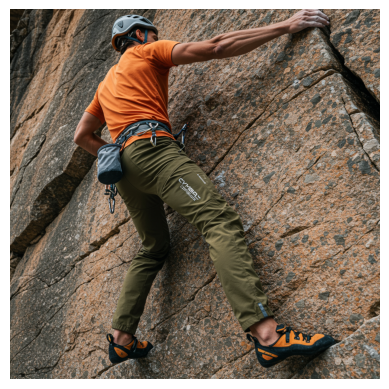

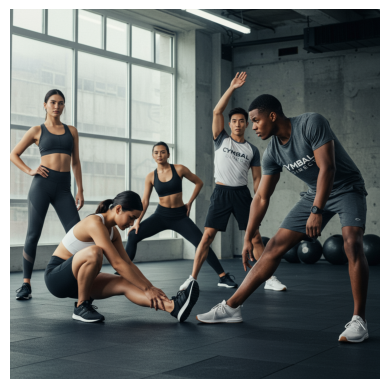

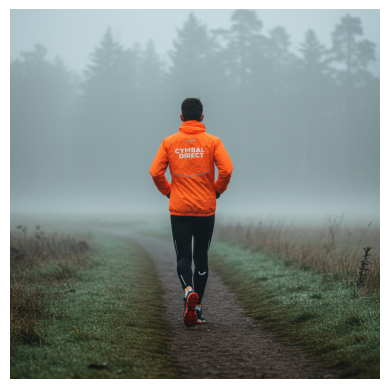

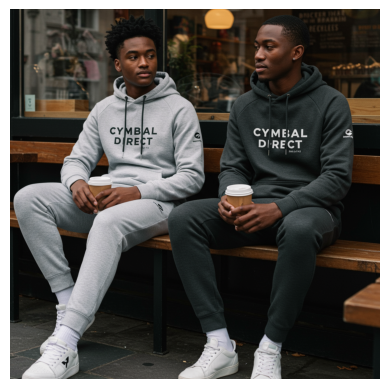

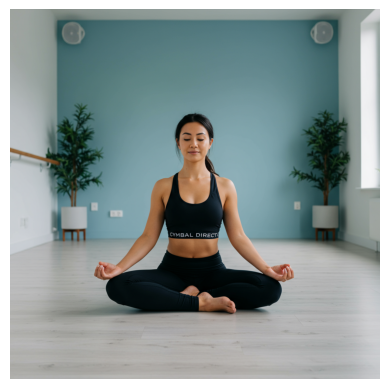

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the directory where the images are stored
image_dir = 'media/images'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Display the images
for image_file in image_files:
    # Construct the full path to the image file
    image_path = os.path.join(image_dir, image_file)
    
    # Load the image
    img = mpimg.imread(image_path)
    
    # Display the image using Matplotlib
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.show()

### Initial Analysis with Gemini 2.0 Flash

For this section, you will need to fill out the `#TODOs` for **Construct the prompt for Gemini** and **Send the prompt and images to Gemini**.

In [12]:
MODEL_ID = "gemini-2.0-flash-001"  # @param {type: "string"}

In [13]:
# 1. Load the image data
image_folder = 'media/images'
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# 2. Load the images into a list of `Part` objects
image_parts = []
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    with open(image_path, 'rb') as f:
        image_bytes = f.read()
    image_parts.append(Part.from_bytes(data=image_bytes, mime_type='image/jpeg'))  # Adjust mime_type if needed

# 3. Construct the prompt for Gemini
# TODO: Write a prompt that instructs the Gemini model to analyze the images of Cymbal Direct's new athletic apparel line.
# The prompt should include clear instructions to:
# - Identify the apparel items in each image.
# - Describe the attributes of each item.
# - Identify any prominent style trends or preferences.
prompt = f"""
analyze the images of Cymbal Direct's new athletic apparel line. for each image:
- Identify the apparel items in each image.
- Describe the attributes of each item.
- Identify any prominent style trends or preferences.
"""  # TODO: Add your prompt here

# 4. Send the prompt and images to Gemini
# TODO: Use the `client.models.generate_content` method to send the prompt and images to the Gemini model.
# TODO: Make sure to specify the `MODEL_ID` and the `contents` (including the prompt and image parts) as parameters.
# TODO: Store the response from the model in a variable named `response`.
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image_parts,
        prompt,
    ],
)

# 5. Display the response
display(Markdown(response.text))

Okay, let's analyze the Cymbal Direct athletic apparel line in the images provided.

**Image 1 (Rock Climber)**

*   **Apparel Items:**
    *   T-shirt (Orange)
    *   Climbing Pants (Olive Green)
    *   Chalk Bag (Gray)

*   **Attributes:**
    *   **T-shirt:** Likely short-sleeved, athletic fit, breathable fabric (potentially moisture-wicking). The color is vibrant and highly visible.
    *   **Climbing Pants:** Slim fit, articulated knees (for ease of movement), durable and flexible fabric, likely with some stretch. There is visible Cymbal branding on the leg. They appear to be a solid olive green, suitable for outdoor use.
    *   **Chalk Bag:** Standard climbing chalk bag, with a drawstring closure and attachment loop for the harness.

*   **Style Trends:**
    *   **Athleisure:** While functional, the pants have a streamlined look that could transition beyond climbing.
    *   **Performance Fabrics:** The emphasis is clearly on functionality and freedom of movement for a specific athletic activity.
    *   **Utility and Durability:** The color and fabric choice of the pants suggest a focus on practicality for the outdoors.

**Image 2 (Gym/Workout Group)**

*   **Apparel Items:**
    *   Sports Bras (Various colors: Gray, White, Black)
    *   Leggings (Gray)
    *   T-shirts (Gray, White with Cymbal Direct logo)
    *   Shorts (Black, Gray)

*   **Attributes:**
    *   **Sports Bras:** Designed for support during workouts, likely with moisture-wicking fabric. They have different strap styles and coverage levels.
    *   **Leggings:** High-waisted, form-fitting, probably made of a stretchy and breathable fabric. Some may have mesh panels for ventilation.
    *   **T-shirts:** Crew neck, athletic fit, breathable fabric with Cymbal branding.
    *   **Shorts:** Athletic cut, likely with a comfortable waistband and breathable fabric.

*   **Style Trends:**
    *   **High-Waisted Leggings:** A popular trend for comfort and a flattering silhouette.
    *   **Minimalist Design:** Clean lines and simple colors dominate.
    *   **Logomania:** The Cymbal Direct logo is prominently displayed on some pieces.
    *   **Performance Focus:** Emphasizing moisture-wicking and comfortable fabrics.

**Image 3 (Runner in Fog)**

*   **Apparel Items:**
    *   Running Jacket (Orange)
    *   Running Tights (Black)

*   **Attributes:**
    *   **Running Jacket:** Lightweight, windproof, water-resistant, and highly visible (bright orange). Likely has reflective details for safety. Contains Cymbal Direct logo on the back.
    *   **Running Tights:** Form-fitting, likely with moisture-wicking fabric and reflective details.

*   **Style Trends:**
    *   **High Visibility:** Safety is clearly a priority, with the bright orange jacket and reflective elements.
    *   **Performance Fabrics:** Key is lightweight, weather protection, and moisture management.
    *   **Minimalist Design:** Clean lines and focus on functionality.

**Image 4 (Two Men on Bench)**

*   **Apparel Items:**
    *   Hoodies (Gray, Charcoal)
    *   Joggers (Gray, Charcoal)

*   **Attributes:**
    *   **Hoodies:** Classic hoodie style, with drawstring hood, kangaroo pocket, and ribbed cuffs and hem. Made with soft, comfortable fabric.  Cymbal Direct logo prominently displayed on the chest.
    *   **Joggers:** Slim fit, elastic waistband with drawstring, ribbed cuffs. Made of a soft, comfortable fabric, likely a blend of cotton and polyester.

*   **Style Trends:**
    *   **Loungewear/Athleisure:** Blurring the lines between athletic wear and casual clothing.
    *   **Matching Sets:** Hoodies and joggers are often sold together as a coordinated outfit.
    *   **Comfort and Softness:** Emphasis on comfortable, everyday wear.

**Image 5 (Yoga Pose)**

*   **Apparel Items:**
    *   Sports Bra (Black)
    *   Leggings (Black)

*   **Attributes:**
    *   **Sports Bra:** Designed for low-impact activities like yoga. Likely with comfortable straps and a supportive fit. Cymbal Direct logo below the chest.
    *   **Leggings:** High-waisted, form-fitting, and made of a stretchy, breathable fabric.

*   **Style Trends:**
    *   **Minimalist Design:** Classic black color and simple design.
    *   **Comfort and Flexibility:** Focus on fabrics and cuts that allow for unrestricted movement.

**Overall Summary of Style Trends and Preferences:**

*   **Performance Focus:** Emphasis on fabrics that are moisture-wicking, breathable, and durable for specific activities.
*   **Athleisure Influence:** Blurring the lines between athletic wear and everyday casual clothing.
*   **Minimalist Design:** Clean lines, simple colors, and a focus on functionality.
*   **Logomania:** The Cymbal Direct logo is often prominently displayed.
*   **Comfort and Softness:** Soft, comfortable fabrics are used in loungewear and everyday athletic wear.
*   **High-Waisted Silhouettes:** A popular trend in leggings and other bottoms.
*   **Practicality:** A focus on colors and designs that are functional for outdoor use (e.g., olive green, high visibility orange).

I hope this analysis is helpful!


### Reasoning on image trends with Gemini-2.5-flash

You'll now use the Thinking model to perform a more in-depth analysis of the visual elements, inferring context, target audience, and potential marketing implications.

For this section, you will need to fill out the `#TODOs` for **Construct the prompt for Gemini** and **Send the prompt and images to the Gemini Thinking model**.

In [14]:
MODEL_ID = "gemini-2.5-flash"  # @param {type: "string"}

In [ ]:
# 1. Construct the prompt for Gemini
# TODO: Write a prompt that instructs the Gemini model to analyze the images in more detail.
# The prompt should include clear instructions to:
# - Develop a hypothesis about the target audience for each image.
# - Analyze how visual elements contribute to the overall message and appeal.
# - Compare the observed style trends with broader fashion trends in athletic wear.
# - Provide recommendations for Cymbal Direct's future marketing campaigns or product development.
thinking_mode_prompt = f"""
analyze the images of Cymbal Direct's new athletic apparel line. for each image:
- Develop a hypothesis about the target audience for each image.
- Analyze how visual elements contribute to the overall message and appeal.
- Compare the observed style trends with broader fashion trends in athletic wear.
- Provide recommendations for Cymbal Direct's future marketing campaigns or product development.
"""

# 2. Send the prompt and images to the Gemini Thinking model
# TODO: Use the `client.models.generate_content` method to send the thinking_mode_prompt and images to the Gemini model.
# TODO: Make sure to specify the `MODEL_ID`, `contents` (including the prompt and image parts), and `config` to enable thinking mode.
# TODO: Store the response from the model in a variable named `thinking_model_response`.
thinking_model_response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image_parts,
        thinking_mode_prompt,
    ],
    config=config,
)

# 3. Print thoughts and answer
print_thoughts(thinking_model_response)

# 4. Save the image analysis to a file
with open('analysis/image_analysis.md', 'w') as f:
    f.write(thinking_model_response.text)

## Task 4. Analyze and reason on audio content: Customer perceptions

In this section, you will use Gemini to analyze a podcast about Cymbal Direct's new clothing line and extract information/sentiment out of it and use those to generate insights for the company. You will save the findings from the model into a markdown file that you will use for a comprehensive report in the last task.

**Your tasks will be labeled with a `#TODO` section in the cell. Read each cell carefully and ensure you are filling them out correctly!**

#### Introduction and Context
This audio clip is from a podcast episode featuring an interview with a Cymbal Direct representative discussing the new athletic apparel line. The conversation covers various aspects of the apparel, including design, features, target audience, and marketing strategy.

### Preview the podcast episode (optional)

To listen to the podcast episode, you can copy the file to your local environment and use iPython to preview it in the notebook.

In [ ]:
import IPython

!gcloud storage cp gs://{PROJECT_ID}-bucket/media/audio/cymbal_direct_expert_interview.wav \
media/audio/cymbal_direct_expert_interview.wav

IPython.display.Audio('media/audio/cymbal_direct_expert_interview.wav')

### Initial analysis with Gemini 2.0 Flash
For this section, you will need to fill out the `#TODOs` for **Construct the prompt for Gemini** and **Send the prompt and audio to Gemini**.

In [ ]:
MODEL_ID = "gemini-2.0-flash-001"  # @param {type: "string"}

In [ ]:
# Construct the file URI using f-string
file_uri = f"gs://{PROJECT_ID}-bucket/media/audio/cymbal_direct_expert_interview.wav"

audio_part = Part.from_uri(
    file_uri=file_uri,
    mime_type="audio/wav",
)

In [ ]:
# 1. Construct the prompt for Gemini
# TODO: Write a prompt that instructs the Gemini model to analyze the audio recording of the conversation about Cymbal Direct's new athletic apparel line.
# The prompt should include clear instructions to:
# - Transcribe the conversation, identifying different speakers.
# - Provide a sentiment analysis, highlighting positive, negative, and neutral opinions.
# - Identify key themes and topics discussed, such as comfort, fit, performance, style, and comparisons to competitors.
thinking_mode_prompt = f"""
analyze the audio recording of the conversation about Cymbal Direct's new athletic apparel line.
- Transcribe the conversation, identifying different speakers.
- Provide a sentiment analysis, highlighting positive, negative, and neutral opinions.
- Identify key themes and topics discussed, such as comfort, fit, performance, style, and comparisons to competitors.
"""

# 2. Send the prompt and audio to Gemini
# TODO: Use the `client.models.generate_content` method to send the thinking_mode_prompt and audio data to the Gemini model.
# TODO: Make sure to specify the `MODEL_ID` and the `contents` (including the `audio_part` and the `prompt`) as parameters.
# TODO: Store the response from the model in a variable named `response`.
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        audio_part,
        thinking_mode_prompt,
    ],
)

# 3. Display the response
display(Markdown(response.text))

### Reasoning on Audio Insights with Gemini-2.5-flash
In this section, you'll use the Thinking model to analyze the conversation at a deeper level, reason about customer satisfaction, deduce influencing factors, and generate data-driven recommendations.

For this section, you will need to fill out the `#TODOs` for **Construct the prompt for Gemini** and **Send the prompt and audio to the Gemini Thinking model**.

In [ ]:
MODEL_ID = "gemini-2.5-flash"  # @param {type: "string"}

In [ ]:
# 1. Construct the prompt for Gemini
# TODO: Write a prompt that instructs the Gemini model to analyze the audio recording in more detail.
# The prompt should include clear instructions to:
# - Reason about the overall customer satisfaction with the apparel.
# - Deduce the key factors influencing customer perception.
# - Develop three data-driven recommendations for Cymbal Direct.
# - Identify any potential biases or limitations in the audio data.
prompt = """
analyze the audio recording in more detail.
- Reason about the overall customer satisfaction with the apparel.
- Deduce the key factors influencing customer perception.
- Develop three data-driven recommendations for Cymbal Direct.
- Identify any potential biases or limitations in the audio data.
"""

# 2. Send the prompt and audio to the Gemini Thinking model
# TODO: Use the `client.models.generate_content` method to send the prompt and audio data to the Gemini model.
# TODO: Make sure to specify the `MODEL_ID`, `contents` (including the `audio_part` and the `prompt`), and `config` to enable thinking mode.
# TODO: Store the response from the model in a variable named `thinking_model_response`.

thinking_model_response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        audio_part,
        prompt,
    ],
    config=config,
)

# 3. Print the thoughts and answer
print_thoughts(thinking_model_response)

# 4. Save the audio analysis to a text file in the analysis folder
with open('analysis/audio_analysis.md', 'w') as f:
    f.write(thinking_model_response.text)

## Task 5. Synthesize multimodal insights: Generate a comprehensive report

In this final task, you will synthesize the insights gained from your previous analyses of text, images, and audio data. You'll use the Gemini-2.5-flash model to generate a comprehensive report that consolidates the findings from each modality, providing a holistic view of customer sentiment, style preferences, and key trends related to Cymbal Direct's new athletic apparel line.

You will save the final report generated by the model into a markdown file, which you will then upload to Cloud Storage for review and evaluation. This comprehensive report will serve as a valuable resource for Cymbal Direct, enabling them to make informed decisions and optimize their strategies based on a thorough understanding of customer perceptions and market trends.

**Your tasks will be labeled with a #TODO section in the cell. Read each cell carefully and ensure you are filling them out correctly!**


In [ ]:
MODEL_ID = "gemini-2.5-flash"  # @param {type: "string"}

In [ ]:
# 1. Load the analysis results from the files
with open('analysis/text_analysis.md', 'r') as f:
    text_analysis = f.read()

with open('analysis/image_analysis.md', 'r') as f:
    image_analysis = f.read()

with open('analysis/audio_analysis.md', 'r') as f:
    audio_analysis = f.read()

# 2. Combine the analysis results
all_analysis = f"""
## Text Analysis:
{text_analysis}

## Image Analysis:
{image_analysis}

## Audio Analysis:
{audio_analysis}
"""

# 3. Construct the prompt for Gemini
# TODO: Write a prompt to instruct the Gemini model to generate a comprehensive report based on the combined analysis results.
# The prompt should include clear instructions to:
# - Summarize the overall sentiment towards the new apparel line.
# - Identify key themes and trends in customer feedback.
# - Provide insights on style preferences, usage patterns, and customer behavior.
# - Evaluate the audio and its fit with the product image.
# - Offer actionable recommendations for Cymbal Direct to refine their marketing strategy and product positioning.
comprehensive_report_prompt = f"""
generate a comprehensive report based on the combined analysis results.
- Summarize the overall sentiment towards the new apparel line.
- Identify key themes and trends in customer feedback.
- Provide insights on style preferences, usage patterns, and customer behavior.
- Evaluate the audio and its fit with the product image.
- Offer actionable recommendations for Cymbal Direct to refine their marketing strategy and product positioning.
analysis results:
{all_analysis}
"""

# 4. Send the prompt to Gemini
# TODO: Use the `client.models.generate_content` method to send the comprehensive_report_prompt to the Gemini model.
# TODO: Make sure to specify the `MODEL_ID`, the `comprehensive_report_prompt`, and the `config` to enable thinking mode.
# TODO: Store the response from the model in a variable named `thinking_model_response`.
thinking_model_response = client.models.generate_content(
    model=MODEL_ID,
    contents=comprehensive_report_prompt,
    config=config,
)

# 5. Print the thoughts and answer
print_thoughts(thinking_model_response)

# 6. Save the final report to a file
with open('analysis/final_report.md', 'w') as f:
    f.write(thinking_model_response.text)

In [ ]:
!gcloud storage cp analysis/final_report.md gs://{PROJECT_ID}-bucket/analysis/final_report.md

## Congratulations!

Congratulations! In this lab, you have successfully utilized the Gemini 2.0 Flash and Thinking models to analyze multimodal data, including text, images, and audio, to gain valuable insights for Cymbal Direct's new athletic apparel line. You have demonstrated proficiency in constructing effective prompts, leveraging the reasoning capabilities of the Thinking model, and generating a comprehensive report with actionable recommendations.

Copyright 2025 Google LLC All rights reserved. Google and the Google logo are trademarks of Google LLC. All other company and product names may be trademarks of the respective companies with which they are associated.